# E-commerce Customer Churn: Exploratory Data Analysis (EDA)
**Tujuan:** 1. Menganalisis distribusi target (Churn).
2. Mengidentifikasi faktor utama (fitur) yang mendorong pelanggan untuk berhenti.
3. Memahami korelasi antar variabel untuk seleksi fitur nantinya.

**Data Source:** `data/processed/data_churn_cleaned.csv`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup visualisasi
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load data yang sudah dibersihkan
file_path = '../data/processed/data_churn_cleaned.csv'
df = pd.read_csv(file_path, sep=';')

print(f"Data siap dianalisis: {df.shape[0]} baris & {df.shape[1]} kolom")
display(df.head())

Data siap dianalisis: 3266 baris & 11 kolom


,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,11.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32.00,0
1,7.0,11.0,4,Mobile,1,Married,2,0,7.0,129.29.00,0
2,8.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54.00,0
3,20.0,11.0,4,Fashion,3,Divorced,7,0,3.0,230.27.00,0
4,8.0,15.0,4,Others,4,Single,8,0,8.0,322.17.00,0


C:\Users\etc\AppData\Local\Temp\ipykernel_19200\583027349.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')


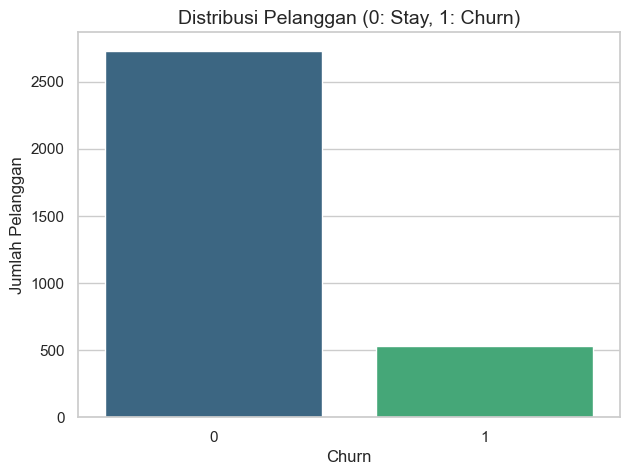

Persentase Churn: 16.35%
Persentase Retained: 83.65%


In [2]:
churn_counts = df['Churn'].value_counts()
churn_perc = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(7, 5))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='viridis')
plt.title('Distribusi Pelanggan (0: Stay, 1: Churn)', fontsize=14)
plt.ylabel('Jumlah Pelanggan')
plt.show()

print(f"Persentase Churn: {churn_perc[1]:.2f}%")
print(f"Persentase Retained: {churn_perc[0]:.2f}%")

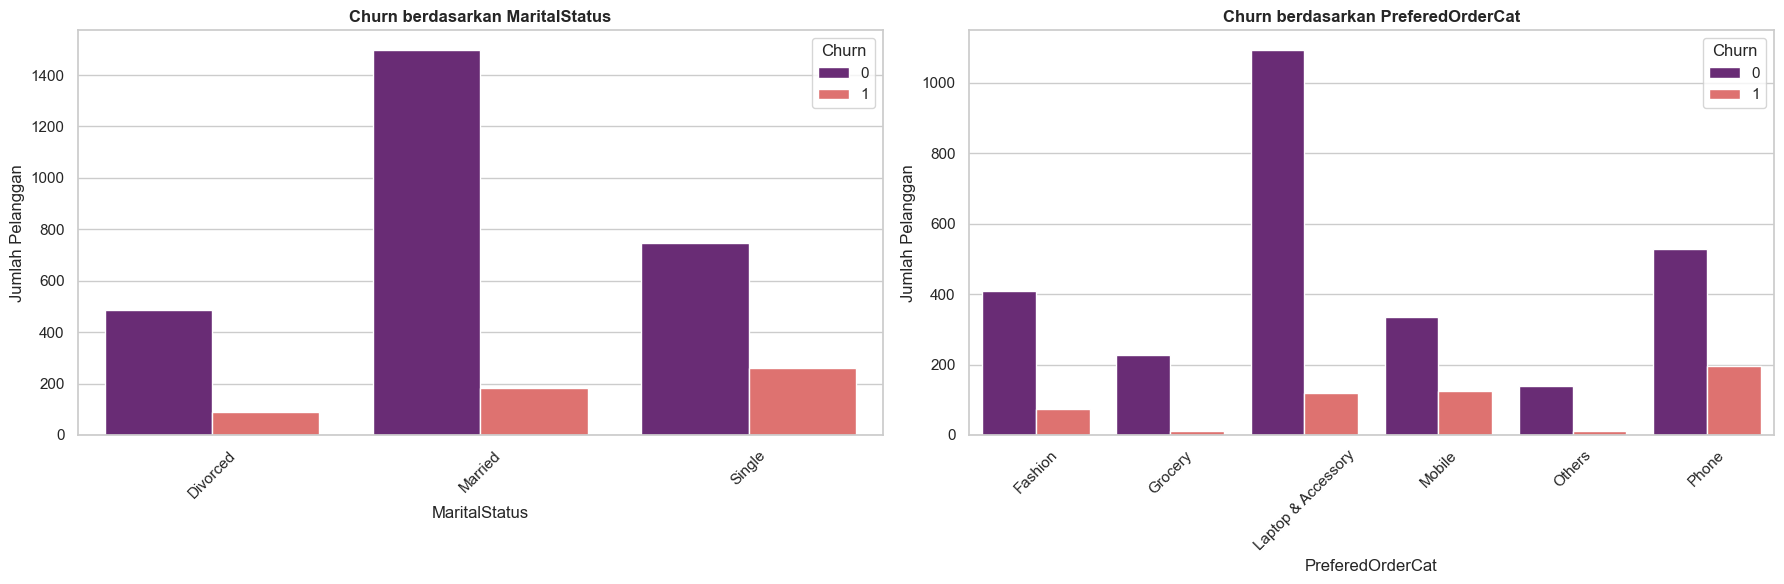

In [4]:
# Pastikan fitur ada di dataframe
cat_features = ['MaritalStatus', 'PreferedOrderCat', 'Complaint']

# Filter hanya fitur yang benar-benar ada di kolom untuk menghindari error
available_features = [col for col in cat_features if col in df.columns]

# Buat canvas plotting
fig, axes = plt.subplots(1, len(available_features), figsize=(18, 6))

# Jika hanya ada 1 fitur, axes bukan list, maka kita ubah jadi list agar bisa di-loop
if len(available_features) == 1:
    axes = [axes]

for i, col in enumerate(available_features):
    # Penanganan error: konversi ke string untuk memastikan Seaborn bisa plotting kategori
    temp_df = df.copy()
    temp_df[col] = temp_df[col].astype(str)
    
    # Plotting dengan penanganan urutan (order) agar visualisasi konsisten
    sns.countplot(
        data=temp_df, 
        x=col, 
        hue='Churn', 
        ax=axes[i], 
        palette='magma',
        order=sorted(temp_df[col].unique())
    )
    
    axes[i].set_title(f'Churn berdasarkan {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Jumlah Pelanggan')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

C:\Users\etc\AppData\Local\Temp\ipykernel_19200\806080485.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\etc\AppData\Local\Temp\ipykernel_19200\806080485.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\etc\AppData\Local\Temp\ipykernel_19200\806080485.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


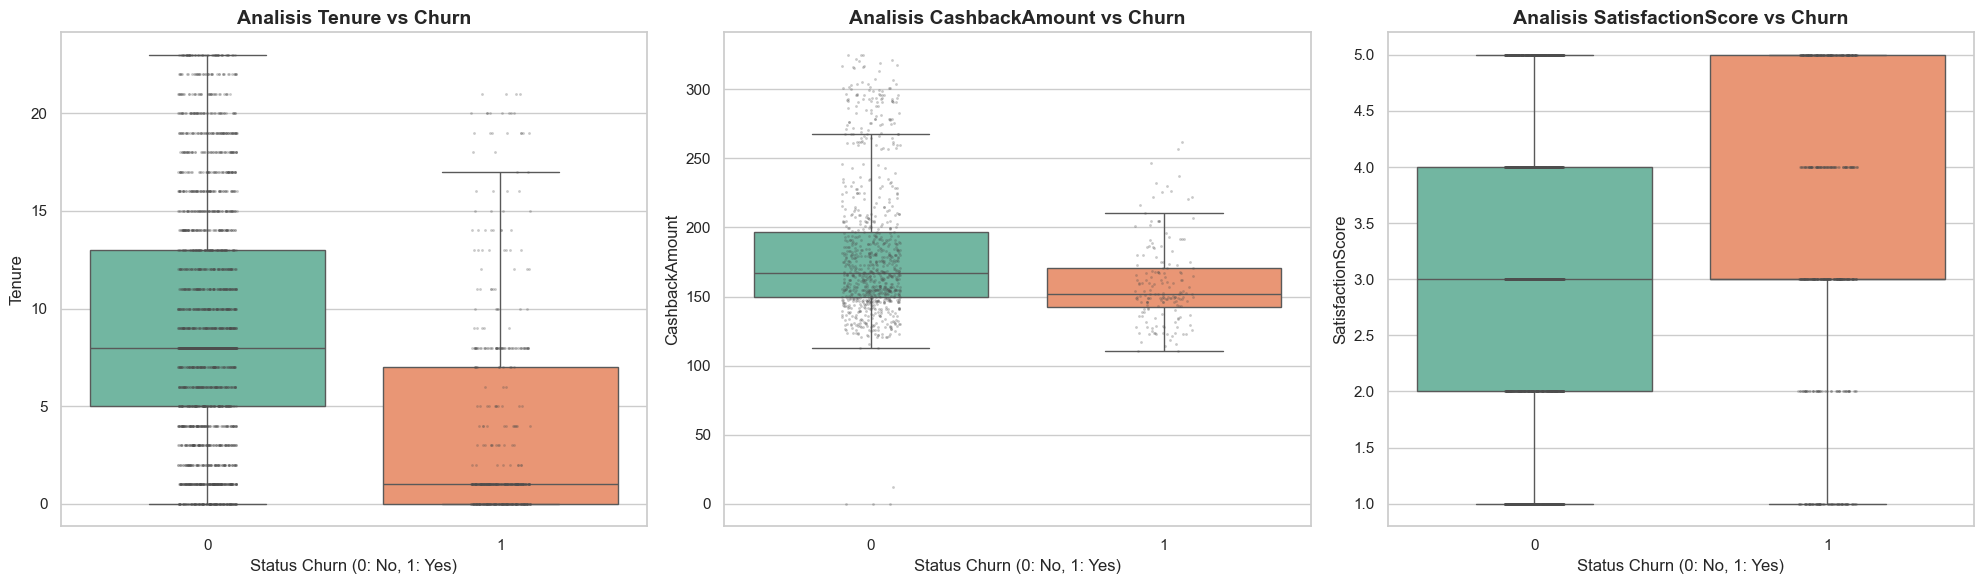

In [6]:
# List fitur numerik yang ingin dianalisis
num_features = ['Tenure', 'CashbackAmount', 'SatisfactionScore']

# Buat canvas
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(num_features):
    # 1. Pastikan data adalah numerik (penting agar tidak berantakan seperti sebelumnya)
    # errors='coerce' akan mengubah data teks yang nyasar menjadi NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # 2. Hapus NaN sementara hanya untuk plotting agar tidak error
    plot_data = df.dropna(subset=[col])
    
    # 3. Plotting Boxplot
    sns.boxplot(
        data=plot_data, 
        x='Churn', 
        y=col, 
        ax=axes[i], 
        palette='Set2',
        showfliers=False # Menyembunyikan outlier ekstrem agar kotak boxplot terlihat jelas
    )
    
    # 4. Tambahkan titik-titik distribusi (Stripplot) agar data lebih "berbicara"
    sns.stripplot(
        data=plot_data, 
        x='Churn', 
        y=col, 
        ax=axes[i], 
        size=2, 
        color=".3", 
        alpha=0.3
    )
    
    axes[i].set_title(f'Analisis {col} vs Churn', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Status Churn (0: No, 1: Yes)', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

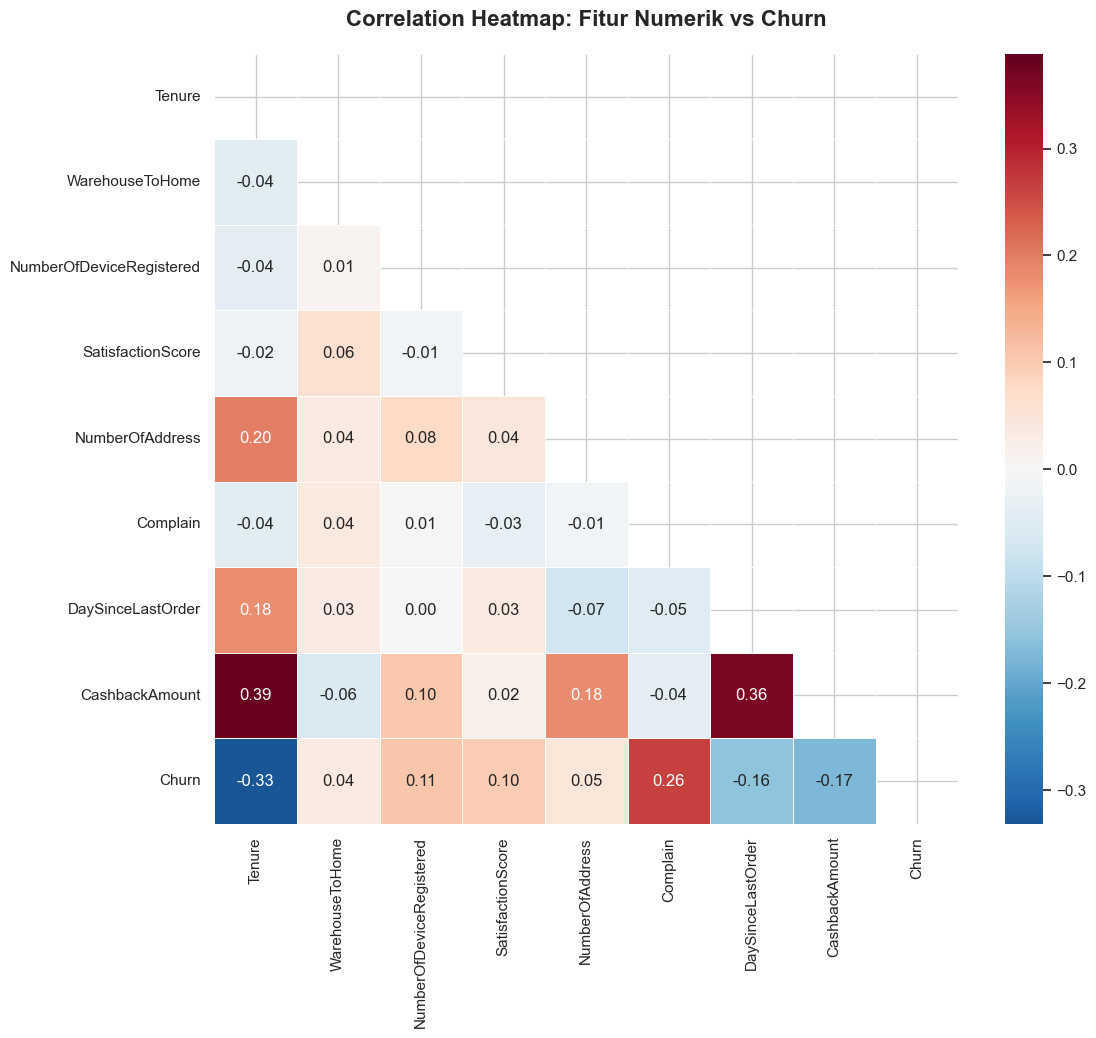

--- Korelasi Fitur terhadap Churn ---
Churn                       1.000000
Complain                    0.262809
NumberOfDeviceRegistered    0.109677
SatisfactionScore           0.098013
NumberOfAddress             0.046472
WarehouseToHome             0.036908
DaySinceLastOrder          -0.155683
CashbackAmount             -0.171709
Tenure                     -0.331584
Name: Churn, dtype: float64


In [7]:
# 1. Menyiapkan data numerik untuk korelasi
# Kita pastikan kolom target 'Churn' masuk dalam perhitungan
numeric_df = df.select_dtypes(include=[np.number])

# 2. Menghitung matriks korelasi
corr_matrix = numeric_df.corr()

# 3. Visualisasi Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # Masking bagian atas agar lebih bersih

sns.heatmap(
    corr_matrix, 
    annot=True, 
    mask=mask, 
    cmap='RdBu_r', 
    fmt='.2f', 
    center=0,
    linewidths=0.5
)

plt.title('Correlation Heatmap: Fitur Numerik vs Churn', fontsize=16, fontweight='bold', pad=20)
plt.show()

# 4. Menampilkan fitur dengan korelasi tertinggi terhadap Churn
print("--- Korelasi Fitur terhadap Churn ---")
print(corr_matrix['Churn'].sort_values(ascending=False))

### 📝 Kesimpulan EDA (Exploratory Data Analysis)

Berdasarkan analisis visualisasi dan korelasi di atas, berikut adalah temuan utama:

1. **Faktor Dominan Churn:**
    * **Complaint:** Terdapat korelasi positif yang cukup kuat antara komplain dan churn. Pelanggan yang pernah melakukan komplain memiliki risiko jauh lebih tinggi untuk berhenti.
    * **Tenure:** Pelanggan dengan masa berlangganan rendah (Tenure < 5-10 bulan) adalah kelompok paling rentan *churn*.
    * **CashbackAmount:** Pelanggan yang mendapatkan cashback lebih rendah cenderung lebih sering *churn*.

2. **Perilaku Pelanggan:**
    * **Satisfaction Score:** Menariknya, skor kepuasan tidak selalu berbanding lurus dengan loyalitas; beberapa pelanggan dengan skor menengah-ke-atas tetap melakukan *churn*.
    * **Marital Status:** Pelanggan dengan status *Single* menunjukkan frekuensi *churn* yang lebih tinggi dibandingkan pelanggan *Married*.

### 🚀 Langkah Strategis Selanjutnya:
1. **Feature Engineering:** Kita perlu melakukan *encoding* pada variabel kategorikal (`MaritalStatus`, `PreferedOrderCat`).
2. **Handling Imbalance:** Karena jumlah pelanggan yang *churn* (1) lebih sedikit dibanding yang tetap (0), kita perlu mempertimbangkan teknik *oversampling* (SMOTE) atau penyesuaian bobot kelas saat modeling.
3. **Modeling:** Kita akan mencoba algoritma *Tree-based* (seperti Random Forest atau XGBoost) yang biasanya sangat tangguh menangani data perilaku pelanggan seperti ini.